In [1]:
"""
Name: con_realistic_example.ipynb
Authors: Stephan Meighen-Berger
Example of the realistic simulations that can be done
"""
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd
import seaborn as sns

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../")

In [5]:
# picture path
PICS = '../pics/'

In [6]:
# Module imports
from contagion import Contagion, config
config["average social circle"] = 40

In [42]:
config

{'debug level': 30,
 'log file handler': '../run/contagion.log',
 'config location': '../run/config.txt',
 'population size': 10000,
 'simulation length': 200,
 'infected': 10,
 'pdf move': 'gauss',
 'random state': RandomState(MT19937) at 0x1D5CD1F8C40,
 'average social circle': 40,
 'variance social circle': 5,
 'social circle pdf': 'gauss',
 'mean social circle interactions': 0.2,
 'variance social circle interactions': 2,
 'social circle interactions pdf': 'gauss',
 'infection probability pdf': 'intensity',
 'infection duration mean': 20,
 'infection duration variance': 5,
 'infection duration pdf': 'gauss',
 'infectious duration mean': 3,
 'infectious duration variance': 5,
 'infectious duration pdf': 'gauss',
 'incubation duration mean': 5,
 'incubation duration variance': 2,
 'incubation duration pdf': 'gauss',
 'hospitalization probability pdf': 'beta',
 'hospitalization probability mean': 0.2,
 'hospitalization probability sd': 0.1,
 'hospitalization duration pdf': 'gauss',
 '

In [24]:
# Creating a contagion object
contagion = Contagion()

In [38]:
# Storing the solutions
contagion.sim()

In [39]:
stats = pd.DataFrame(contagion.statistics)

,contacts,removed,incubation,infectious,infected,new infections,newly infectious,newly removed,will be hospitalized,will die,new deaths,total_deaths
0,25,1,10,9,19,10,0,1,5,0,0,0
1,23,1,25,9,34,15,0,0,3,0,0,0
2,22,1,37,9,46,12,0,0,2,0,0,0
3,28,2,46,11,57,12,3,1,1,0,0,0
4,34,2,59,14,73,16,3,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,9945,0,0,0,0,0,0,0,0,0,186
196,0,9945,0,0,0,0,0,0,0,0,0,186
197,0,9945,0,0,0,0,0,0,0,0,0,186
198,0,9945,0,0,0,0,0,0,0,0,0,186


In [44]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.

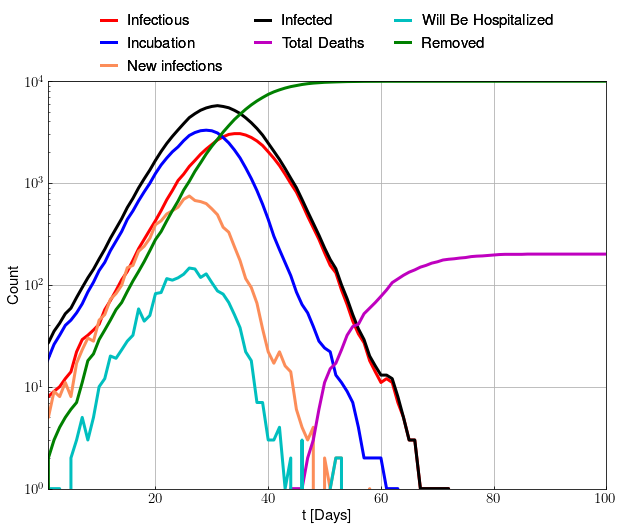

In [45]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax.plot(contagion.t, stats['infectious'],
        lw=lw, label='Infectious', color='r')
ax.plot(contagion.t, stats['incubation'],
        lw=lw, label='Incubation', color='b')
ax.plot(contagion.t, stats['new infections'],
        lw=lw, label='New infections', color=colors[1])
ax.plot(contagion.t, stats['infected'],
        lw=lw, label='Infected', color="k")
ax.plot(contagion.t, stats['total_deaths'],
        lw=lw, label='Total Deaths', color="m")
ax.plot(contagion.t, stats['will be hospitalized'],
        lw=lw, label='Will Be Hospitalized', color="c")
ax.plot(contagion.t, stats['removed'],
        lw=lw, label='Removed', color='g')
ax.set_xlim(1e0, 100)
ax.set_ylim(0., config['population size'] * 1.01)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.semilogy()
plt.ylim(1, 1E4)
plt.show()



In [46]:
figure.savefig(PICS + "Contagion_Example.png",
               bbox_inches='tight')

In [72]:
from contagion.pdfs import Beta

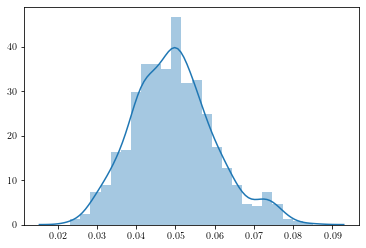

In [87]:
rvs = Beta(0.05, 0.01).rvs(1000)
sns.distplot(rvs)

In [88]:
np.mean(rvs)
np.std(rvs)

0.010409190030506681